In [ ]:
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
covid_data='/content/drive/My Drive/Colab Notebooks/data/covid.csv'

In [ ]:
nc='/content/drive/My Drive/Colab Notebooks/data/noncovid.csv'

In [ ]:
df1=pd.read_csv(covid_data)
print(df1.shape)

In [ ]:
df2=pd.read_csv(nc)
print(df2.shape)

(35000, 3)


In [ ]:
df2.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [ ]:
df1.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,NaN,Mon Jan 27 12:59:36 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,9450,1.221444e+18,soareschen,"<a href=""http://twitter.com/download/iphone"" r...",RT @soareschen: I am a Malaysian living in Ger...,https://twitter.com/muizziasyraf03/status/1221...,Mon Jan 16 06:27:13 +0000 2012,muizziasyraf03,false,NaN,91503,360,603,1,#AGFC #STR #GGMU,muizzuddin asyraf,muizziasyraf03,73971,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Mon Jan 27 12:59:39 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,9450,1.221444e+18,soareschen,"<a href=""http://twitter.com/download/android"" ...",RT @soareschen: I am a Malaysian living in Ger...,https://twitter.com/amalinahamid_/status/12217...,Sun Apr 30 17:37:59 +0000 2017,amalinahamid_,false,Saya selalu masak sebab saya rajin makan bukan...,11674,75,204,0,NaN,amalina,amalinahamid_,7794,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Mon Jan 27 12:59:45 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,1534,1.221643e+18,richardker,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @richardker: “Mommy is going there to fight...,https://twitter.com/bethanygrasya/status/12217...,Mon Jul 29 14:06:35 +0000 2019,bethanygrasya,false,bella ciao,2917,740,831,0,••-• -•-• -•- ••-,nostalgia,bethanygrasya,1785,NaN,https://www.instagram.com/bethanyserapiooo/feed/,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Mon Jan 27 12:59:53 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,30102,1.221410e+18,AyinAzirinee,"<a href=""http://twitter.com/download/iphone"" r...",RT @AyinAzirinee: Good article on how to reduc...,https://twitter.com/zawanizaid/status/12217798...,Sun Oct 14 06:48:47 +0000 2012,zawanizaid,false,What do you want to be remembered for?,8360,529,557,2,NaN,🌷,zawanizaid,32120,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Mon Jan 27 12:59:37 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,581,1.221770e+18,inquirerdotnet,"<a href=""http://twitter.com/download/android"" ...",RT @inquirerdotnet: JUST IN: Health Sec. Franc...,https://twitter.com/caluyocesca/status/1221779...,Thu Jul 14 09:38:58 +0000 2011,caluyocesca,false,In pursuit of Ikigai,7153,646,343,3,NaN,🌻,caluyocesca,28796,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
non_covid_data='/content/drive/My Drive/Colab Notebooks/data/noncovid.csv'

In [ ]:
df2=pd.read_csv(non_covid_data)
print(df2.shape)

(35000, 3)


In [ ]:
df2.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [ ]:
c=[]
j=0
f=0
ma=0
a=0
my=0
jn=0
jl=0
ag=0
date=df1['created_at']
date.tail()
for i in range(date.size):
  if 'Jan' in str(date[i]):
    j+=1
  elif 'Feb' in date[i]:
    f+=1
  elif 'Mar' in date[i]:
    ma+=1
  elif 'Apr' in date[i]:
    a+=1
  elif 'May' in date[i]:
    my+=1
  elif 'Jun' in date[i]:
    jn+=1
  elif 'Jul' in date[i]:
    jl+=1
  elif 'Aug' in date[i]:
    ag+=1

c=[j,f,ma,a,my,jn,jl,ag]
  
    

In [ ]:
print(c)

[1180, 1080, 3954, 4990, 5979, 6069, 6117, 5631]


In [ ]:
import matplotlib.pyplot as plt
x=['Jan','Feb','Mar','Apr','May','June','July','Aug']
y=[j,f,ma,a,my,jn,jl,ag]
plt.bar(x,y, width=0.8)

In [ ]:
d=df1[(df1.user_location!='0') & (df1.user_location != '1') & (df1.user_location != 'she/her') & (df1.user_location != '2') & (df1.user_location != '3') & (df1.user_location != 'Global') & (df1.user_location != '日本') & (df1.user_location != 'Earth') & (df1.user_location != 'CDMX')  & (df1.user_location != '4') & (df1.user_location != '5') & (df1.user_location != '6') & (df1.user_location != '7') & (df1.user_location != '8') & (df1.user_location != '9')  ]

In [ ]:
dloc=d['user_location'].value_counts()
dloc=dloc[dloc>=30]

In [ ]:
dloc

United States         450
USA                   192
California, USA       133
Los Angeles, CA       119
Venezuela             117
                     ... 
Massachusetts, USA     32
New York City          31
Michigan               31
Maryland, USA          30
Pittsburgh, PA         30
Name: user_location, Length: 72, dtype: int64

In [ ]:
dloc = list(dloc.index)

In [ ]:
dloc

['United States',
 'USA',
 'California, USA',
 'Los Angeles, CA',
 'Venezuela',
 'India',
 'Florida, USA',
 'Texas, USA',
 'New York, NY',
 'México',
 'Washington, DC',
 'Canada',
 'London',
 'London, England',
 'United Kingdom',
 'Houston, TX',
 'Chicago, IL',
 'Brasil',
 'Australia',
 'New Delhi, India',
 'New York, USA',
 'Atlanta, GA',
 'Buenos Aires, Argentina',
 'England, United Kingdom',
 'Indonesia',
 'Toronto, Ontario',
 'Caracas, Venezuela',
 'Colombia',
 'Seattle, WA',
 'South Africa',
 'UK',
 'Boston, MA',
 'North Carolina, USA',
 'Lagos, Nigeria',
 'Malaysia',
 'Argentina',
 'San Francisco, CA',
 'New Jersey, USA',
 'Georgia, USA',
 'Dallas, TX',
 'Texas',
 'Austin, TX',
 'España',
 'Rio de Janeiro, Brasil',
 'Bogotá, D.C., Colombia',
 'San Diego, CA',
 'Chile',
 'France',
 'Madrid',
 'Paris, France',
 'Philadelphia, PA',
 'Pennsylvania, USA',
 'NYC',
 'California',
 'São Paulo, Brasil',
 'New York',
 'Brooklyn, NY',
 'Virginia, USA',
 'Michigan, USA',
 'Arizona, USA',
 'M

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='twitter-analysis-cl')

In [ ]:
geolocated = list(map(lambda x: [x,geolocator.geocode(x)[1] if geolocator.geocode(x) else None],dloc))
geolocated = pd.DataFrame(geolocated)


In [ ]:
geolocated

,0,1
0,United States,"(39.7837304, -100.4458825)"
1,USA,"(39.7837304, -100.4458825)"
2,"California, USA","(36.7014631, -118.7559974)"
3,"Los Angeles, CA","(34.0536909, -118.2427666)"
4,Venezuela,"(8.0018709, -66.1109318)"
...,...,...
67,"Massachusetts, USA","(42.3788774, -72.032366)"
68,New York City,"(40.7127281, -74.0060152)"
69,Michigan,"(43.6211955, -84.6824346)"
70,"Maryland, USA","(39.5162234, -76.9382069)"


In [ ]:
geolocated.columns = ['locat','latlong']
geolocated['lat'] = geolocated.latlong.apply(lambda x: x[0])
geolocated['lon'] = geolocated.latlong.apply(lambda x: x[1])

In [ ]:
geolocated

,locat,latlong,lat,lon
0,United States,"(39.7837304, -100.4458825)",39.783730,-100.445882
1,USA,"(39.7837304, -100.4458825)",39.783730,-100.445882
2,"California, USA","(36.7014631, -118.7559974)",36.701463,-118.755997
3,"Los Angeles, CA","(34.0536909, -118.2427666)",34.053691,-118.242767
4,Venezuela,"(8.0018709, -66.1109318)",8.001871,-66.110932
...,...,...,...,...
67,"Massachusetts, USA","(42.3788774, -72.032366)",42.378877,-72.032366
68,New York City,"(40.7127281, -74.0060152)",40.712728,-74.006015
69,Michigan,"(43.6211955, -84.6824346)",43.621195,-84.682435
70,"Maryland, USA","(39.5162234, -76.9382069)",39.516223,-76.938207


In [ ]:
geolocated.drop(columns=['latlong'])

,locat,lat,lon
0,United States,39.783730,-100.445882
1,USA,39.783730,-100.445882
2,"California, USA",36.701463,-118.755997
3,"Los Angeles, CA",34.053691,-118.242767
4,Venezuela,8.001871,-66.110932
...,...,...,...
67,"Massachusetts, USA",42.378877,-72.032366
68,New York City,40.712728,-74.006015
69,Michigan,43.621195,-84.682435
70,"Maryland, USA",39.516223,-76.938207


In [ ]:
#mapdata = pd.merge(df1,geolocated, how='inner', left_on='user_location', right_on='locat')

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
# !pip install proj geos
# !pip install cython numpy pyshp six

In [ ]:
# !pip install shapely

In [ ]:
# !apt-get -qq install python-cartopy python3-cartopy

In [ ]:
# locations = mapdata.groupby(by=['locat','lat','lon'])\
#        .count()['created_at']\
#        .sort_values(ascending=False)

In [ ]:
# locations

In [ ]:
!pip list -v

In [ ]:
from matplotlib.image import imread
ruh_m = plt.imread('/content/drive/My Drive/Colab Notebooks/data/globe.png')

In [ ]:
BBox = ((geolocated.lon.min(),  geolocated.lon.max(),      
         geolocated.lat.min(), geolocated.lat.max()))

In [ ]:
BBox

(-122.3300624, 134.755, -34.9964963, 61.0666922)

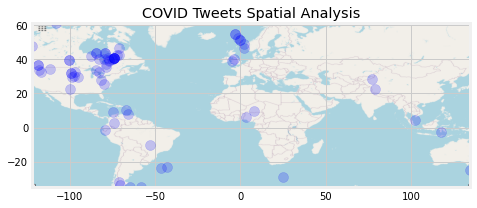

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(geolocated.lon, geolocated.lat, zorder=1, alpha= 0.2, c='b', s=100)
ax.set_title('COVID Tweets Spatial Analysis')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
df1

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,NaN,Mon Jan 27 12:59:36 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,9450,1.221444e+18,soareschen,"<a href=""http://twitter.com/download/iphone"" r...",RT @soareschen: I am a Malaysian living in Ger...,https://twitter.com/muizziasyraf03/status/1221...,Mon Jan 16 06:27:13 +0000 2012,muizziasyraf03,false,NaN,91503,360,603,1,#AGFC #STR #GGMU,muizzuddin asyraf,muizziasyraf03,73971,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Mon Jan 27 12:59:39 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,9450,1.221444e+18,soareschen,"<a href=""http://twitter.com/download/android"" ...",RT @soareschen: I am a Malaysian living in Ger...,https://twitter.com/amalinahamid_/status/12217...,Sun Apr 30 17:37:59 +0000 2017,amalinahamid_,false,Saya selalu masak sebab saya rajin makan bukan...,11674,75,204,0,NaN,amalina,amalinahamid_,7794,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Mon Jan 27 12:59:45 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,1534,1.221643e+18,richardker,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @richardker: “Mommy is going there to fight...,https://twitter.com/bethanygrasya/status/12217...,Mon Jul 29 14:06:35 +0000 2019,bethanygrasya,false,bella ciao,2917,740,831,0,••-• -•-• -•- ••-,nostalgia,bethanygrasya,1785,NaN,https://www.instagram.com/bethanyserapiooo/feed/,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Mon Jan 27 12:59:53 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,30102,1.221410e+18,AyinAzirinee,"<a href=""http://twitter.com/download/iphone"" r...",RT @AyinAzirinee: Good article on how to reduc...,https://twitter.com/zawanizaid/status/12217798...,Sun Oct 14 06:48:47 +0000 2012,zawanizaid,false,What do you want to be remembered for?,8360,529,557,2,NaN,🌷,zawanizaid,32120,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Mon Jan 27 12:59:37 +0000 2020,NaN,NaN,NaN,0,1.221780e+18,NaN,NaN,NaN,en,NaN,NaN,581,1.221770e+18,inquirerdotnet,"<a href=""http://twitter.com/download/android"" ...",RT @inquirerdotnet: JUST IN: Health Sec. Franc...,https://twitter.com/caluyocesca/status/1221779...,Thu Jul 14 09:38:58 +0000 2011,caluyocesca,false,In pursuit of Ikigai,7153,646,343,3,NaN,🌻,caluyocesca,28796,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,NaN,Mon Aug 17 12:02:02 +0000 2020,NaN,NaN,https://sebastianrushworth.com/2020/08/04/how-...,0,1.295330e+18,NaN,NaN,NaN,en,NaN,True,27,1.295318e+18,kimuramoriyo,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @kimuramoriyo: How bad is covid really? (A ...,https://twitter.com/DrStrangel/status/12953300...,Fri Sep 16 08:24:08 +0000 2011,DrStrangel,false,映画、漫画、小説等サブカル全般、加えて小林よしのりと中日ドラゴンズ、浦和レッドダイヤモンズの...,410445,1959,4995,28,NaN,Mr.H(え〜い16回目(❗)のシャドウバン😅😅😅😅😅😅😅😅😅😅😅😅😅),DrStrangel,541926,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34996,NaN,Mon Aug 17 12:02:02 +0000 2020,Leverkusen,NaN,http://ots.de/476f65,0,1.295330e+18,NaN,NaN,NaN,de,NaN,False,1,NaN,NaN,"<a href=""http://presseportal.de"" rel=""nofollow...",pronova BKK: Corona-Krise: Kinder in seelische...,https:

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install nltk

In [ ]:
from nltk.corpus import stopwords
additional  = ['rt','rts','retweet']
swords = set().union(stopwords.words('english'),additional)

In [ ]:
df1['processed_text'] = df1['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\

In [ ]:
import nltk.sentiment.vader as vd
from nltk import download
download('vader_lexicon')
sia = vd.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1[['processed_text','sentiment_score']].head(n=10)

,processed_text,sentiment_score
0,"[malaysian, living, germany, currently, health...",0.8234
1,"[malaysian, living, germany, currently, health...",0.8234
2,"[mommy, going, fight, monster, virus, back, so...",-0.7636
3,"[good, article, reduce, chance, getting, coron...",1.0086
4,"[health, sec, francisco, duque, confirms, 3, c...",0.1027
5,"[good, article, reduce, chance, getting, coron...",1.0086
6,"[china, started, building, 2nd, special, hospi...",0.4019
7,"[wuhan, flu, dangerous, know, also, dangerous,...",-1.8119
8,"[people, singing, national, anthem, apartments...",0.0000
9,"[wuhan, virus, culprits, bats, snakes, expose,...",-0.5550


In [ ]:
df1['sentiment_score'].apply(lambda x:round(x,)).value_counts()

 0    26896
-1     4106
 1     3387
-2      341
 2      205
-3       32
 3       24
-4        4
 4        3
-5        2
Name: sentiment_score, dtype: int64

In [ ]:
sent_classification = pd.cut(df1['sentiment_score'],\
          [-3,-1.2, 0, 1.2 , 3],\
          right=True,\
          include_lowest=True,\
          labels=['strongly negative', 'negative', 'positive', 'strongly positive'])

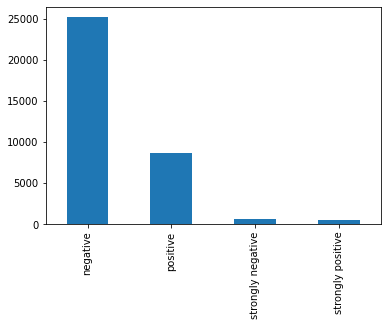

In [ ]:
sent_classification.value_counts().plot(kind='bar')

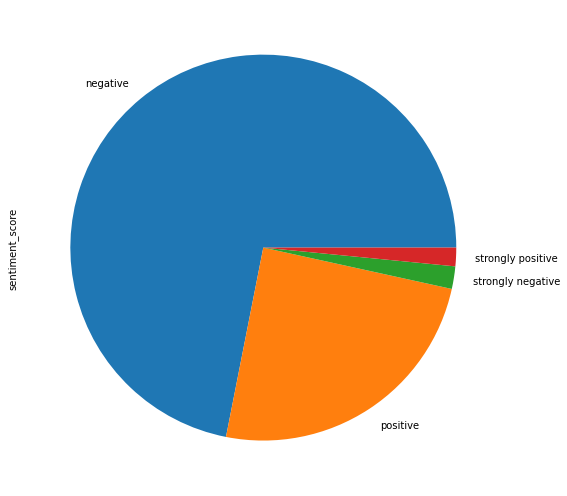

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7)) #make it smaller this time
sent_classification.value_counts().plot(kind='pie')
plt.grid(False)
plt.tight_layout()

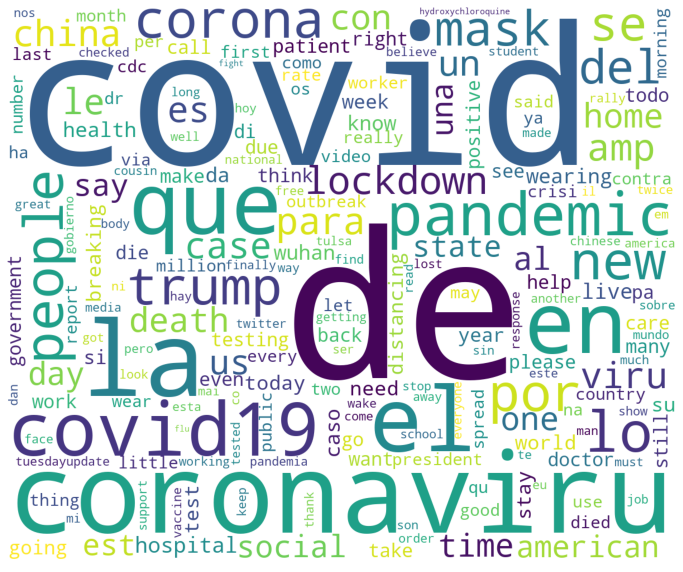

In [ ]:
from wordcloud import WordCloud, STOPWORDS
bigstring = df1['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')
plt.figure(figsize=(12,12))
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=1000
                         ).generate(bigstring)
plt.axis('off')
plt.imshow(wordcloud)

In [ ]:
import re
hashtags = df1['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .to_frame().reset_index()\
                     .sort_values(by=0,ascending=False)
hashtags.columns = ['hashtag','occurences']

NameError: ignored

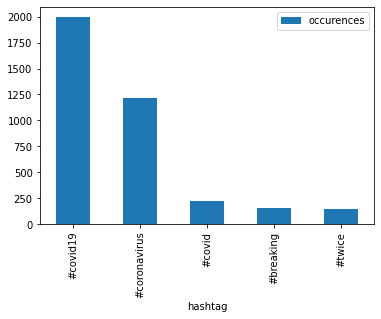

In [ ]:
hashtags[:5].plot(kind='bar',y='occurences',x='hashtag')
plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 5 Hashtags, language: English', fontsize=14)

In [ ]:
import re
words = df1['processed_text'].dropna()\
                            .apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .to_frame()\
                            .reset_index()\
                            .sort_values(by=0,ascending=False)
words.columns = ['word','occurences']

In [ ]:
from nltk import bigrams
import matplotlib.pyplot as plt

bigramseries = pd.Series([word for sublist in df1['processed_text'].dropna()\
                    .apply(lambda x: [i for i in bigrams(x)])\
                    .tolist() for word in sublist])\
                    .value_counts()

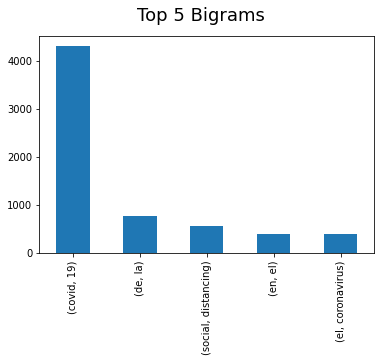

In [ ]:
plt.suptitle('Top 5 Bigrams', fontsize=18)
bigramseries[:5].plot(kind='bar')

In [ ]:
text_arr=[]
s=""
for i in range(0,35000):
  s=str(df2['SentimentText'][i])
  text_arr.append(s)
  



In [ ]:
ss=""
for i in range(0,35000,1):
  ss=ss+str(text_arr[i])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
count_vec = CountVectorizer(stop_words='english')
count_occurs = count_vec.fit_transform([ss])
count_occur_df = pd.DataFrame(
    (count, word) for word, count in
     zip(count_occurs.toarray().tolist()[0], 
    count_vec.get_feature_names()))
count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df.head(n=30)
